In [3]:
##################################################################################################################
#Import section
from scipy import io
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from math import isnan
import numpy.ma as ma

import plotly.plotly as py
import plotly.graph_objs as go

##################################################################################################################
#Loading the file
from loader import load
MUA = load('B20141210_1_MUA.mat')["MUA"]


In [15]:
##################################################################################################################
#Tool box


def compute_mask(data):
    plop = data["LUM"][0][0]["psMS_S"][0][0]
    a = np.nanmean(plop,axis=2)
    b = np.nanmean(a,axis=0)
    c = list(map(lambda x : not isnan(x),b))
    return c

def remove_nan(data):
    a = np.nanmean(data,axis=2)
    b = np.nanmean(a,axis=0)
    c = list(map(lambda x : not isnan(x),b))
    return c    


def compute_too_much_mask(data,threshold=0.9):
    global_mean = np.nanmean(data)
    a = np.mean(data,axis=0)
    c = list(map(lambda x : x < threshold*global_mean,a))
    return c


def smoother(data,window=10):
    result = []
    for i in range(len(data)):
        a = data[int(max(0,i-window/2)):int(min(len(data-1),i+window/2))]
        result.append(np.mean(a))
    return result

def nan_mask(data,index):
    mask = np.nanmean(data,axis=index)
    mask = list(map(lambda x : not isnan(x),mask))
    return mask

def remove_nan_from_data(data,index):
    mask = nan_mask(data,index)
    if index==0:
        return data[:,mask]
    else:
        return data[mask,:]
    
def get_overlap_channels(data):
    overlap = data["INFO"][0][0]["RFoverlap"][0][0]["V1overlap"][0][0][0]
    return overlap
    
    
def get_data(full_data,data_type):
    if data_type == "correct_rejections":
        pass
    elif data_type == "false_alarm":
        data = full_data["psMS_fa"][0][0]
    elif data_type == "seen":
        data = full_data["LUM"][0][0]["psMS_S"][0]
    elif data_type == "missed":
        data = full_data["LUM"][0][0]["psMS_M"][0]
    elif data_type == "time":
        data = full_data["INFO"][0][0]["Time"][0][0][0]
    else:
        raise(BaseException("Data Type not found"))
    return data

def overlap_data(data,full_data):
    overlap = get_overlap_channels(full_data)
    data= data[:,overlap,:]
    return data

def average_over(data,time=False,channels=False,trials=False,contrast=False):
    if contrast:
        averaged_data = []
        for trial_data in data:
            trial_data_averaged = average_over(trial_data,time=time,channels=channels,trials=trials)
            averaged_data.append(trial_data_averaged)

        data = np.asarray(averaged_data)
        data = np.nanmean(averaged_data,0)
    else:
        if trials:
            data = np.nanmean(data,2)
        if channels:
            data = np.nanmean(data,1)
        if time:
            data = np.nanmean(data,0)
    return data

def array_smoother(data,window=50):
    smoothed_data = []
    for i in range(len(data[0])):
        smoothed_data.append(smoother(data[:,i]-np.nanmean(data[:,i],axis=0),window))
    smoothed_data = np.transpose(np.asarray(smoothed_data))
    return smoothed_data

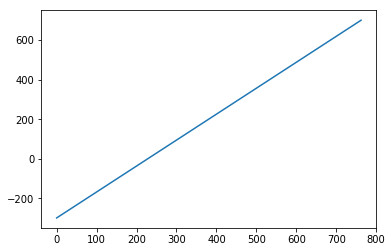

763


In [20]:
###################################################################################################################
#Getting the timing step
timing_step = get_data(MUA,"time")*1000


#TO BE FIXED


plt.plot(timing_step)
plt.show()
print(len(timing_step))

(610, 96, 7)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning:

Mean of empty slice



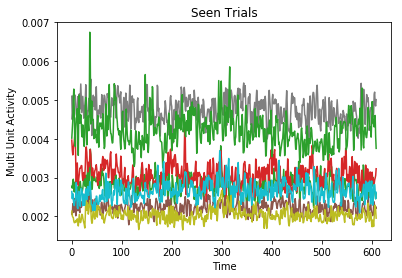

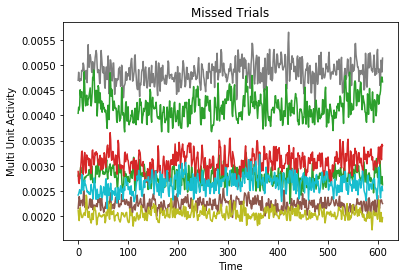

In [21]:
##################################################################################################################
#Ploting average over trials for each electrodes for missed and seen trials for first contrast category


#Gathering seen trials data
seen_data = get_data(MUA,"seen")[0]
print(seen_data.shape)
#Selecting overlaping channels
seen_data = overlap_data(seen_data,MUA)
#Averaging over trials
averaged_seen_data = average_over(seen_data,time=False,channels=False,trials=True)
#Gathering Missed trials data
missed_data = get_data(MUA,"missed")[0]
#Selecting overlaping channels
missed_data = overlap_data(missed_data,MUA)
#Averaging over trials
averaged_missed_data = average_over(missed_data,time=False,channels=False,trials=True)

#Ploting the graphs
plt.plot(averaged_seen_data)
plt.title("Seen Trials")
plt.xlabel("Time")
plt.ylabel("Multi Unit Activity")
plt.figure()
plt.title("Missed Trials")
plt.plot(averaged_missed_data)
plt.xlabel("Time")
plt.ylabel("Multi Unit Activity")
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning:

Mean of empty slice



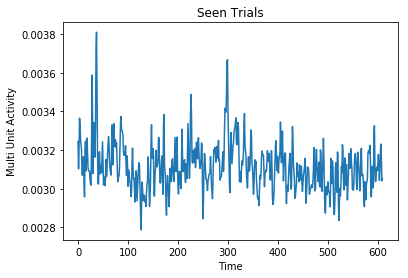

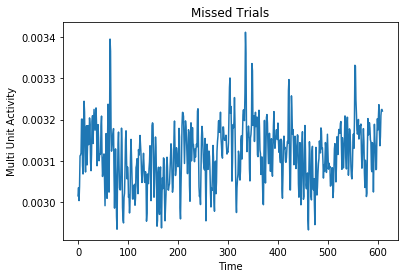

In [4]:
##################################################################################################################
#Ploting average over trials over electrodes for missed and seen trials


#Gathering seen trials data
seen_data = get_data(MUA,"seen")[0]
#Selecting overlaping channels
seen_data = overlap_data(seen_data,MUA)
#Averaging over channels over trials
averaged_seen_data = average_over(seen_data,time=False,channels=True,trials=True)
#Gathering missed trials data
missed_data = get_data(MUA,"missed")[0]
#Selecting overlaping channels
missed_data = overlap_data(missed_data,MUA)
#Averaging over channels over trials
averaged_missed_data = average_over(missed_data,time=False,channels=True,trials=True)

#Ploting the graphs
plt.plot(averaged_seen_data)
plt.title("Seen Trials")
plt.xlabel("Time")
plt.ylabel("Multi Unit Activity")
plt.figure()
plt.title("Missed Trials")
plt.plot(averaged_missed_data)
plt.xlabel("Time")
plt.ylabel("Multi Unit Activity")
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning:

Mean of empty slice



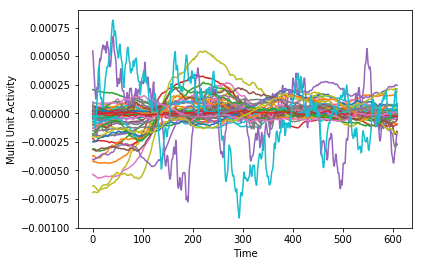

In [5]:
##################################################################################################################
#Ploting average over trials for each electrodes for false alarm


#Gathering false alarm trials data
false_alarm_data = get_data(MUA,"false_alarm")
#Averaging over trials
false_alarm_data_averaged = average_over(false_alarm_data,time=False,channels=False,trials=True)
#Removing corrupted channels
false_alarm_data_averaged = remove_nan_from_data(false_alarm_data_averaged,0)

#Smoothing the data
smoothed_data = array_smoother(false_alarm_data_averaged)

#Ploting the graph
plt.plot(smoothed_data)
plt.xlabel("Time")
plt.ylabel("Multi Unit Activity")
plt.show()


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning:

Mean of empty slice



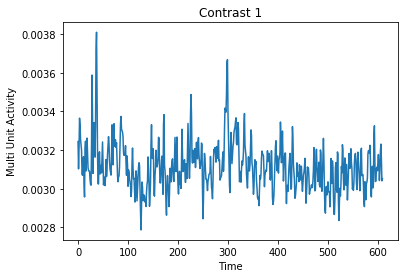

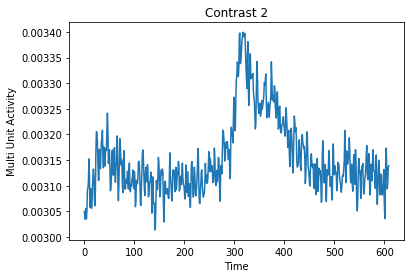

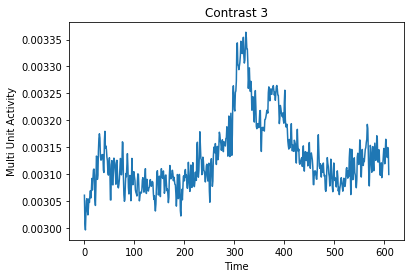

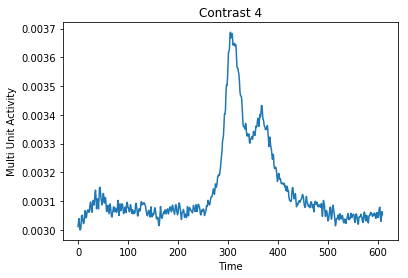

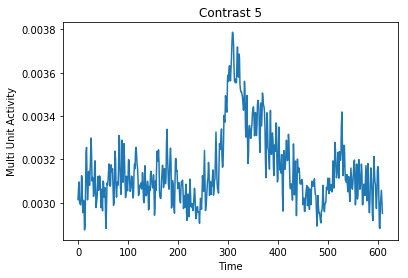

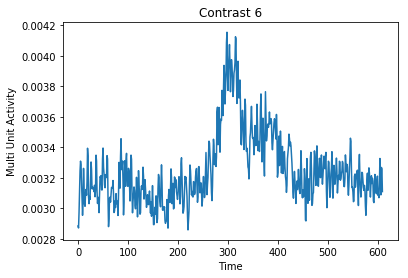

<Figure size 432x288 with 0 Axes>

In [6]:
##################################################################################################################
#Ploting average over trials over electrodes for contrast


#Gathering seen trials data
seen_data = get_data(MUA,"seen")

#Averaging over trials over electrodes
for i in range(len(seen_data)):
    contrast_data = overlap_data(seen_data[i],MUA)
    contrast_data_averaged = average_over(contrast_data,time=False,channels=True,trials=True)
    seen_data[i] = contrast_data_averaged

#Ploting the graphs
for i in range(len(seen_data)):
    plt.plot(seen_data[i])
    plt.title("Contrast " + str(i+1))
    plt.xlabel("Time")
    plt.ylabel("Multi Unit Activity")
    plt.figure()
plt.show()
